## Copy Move Forgery Detection(DBSCAN Clustering)

This is an implementation to detect Copy move forgery detection using DBSCAN clustering using OpenCV and sklearn. This technique can be used to detect a forgery in many cases.

In [1]:
print("CoMoFoD using DBSCAN Clustering")

CoMoFoD using DBSCAN Clustering


Installing OpenCV library for processing images

In [2]:
# !pip install opencv-python


Installing an older version of opencv to use cv2.xfeatures2d.SIFT_create() 

SIFT features extraction is moved from OpenCV as SIFT is patented. Downgraded OpenCV to use SIFT function in opencv.

In [3]:
!pip install opencv-contrib-python==3.4.11.45

     |████████████████████████████████| 54.7 MB 1.6 MB/s 
  Attempting uninstall: opencv-contrib-python
    Found existing installation: opencv-contrib-python 4.1.2.30
    Uninstalling opencv-contrib-python-4.1.2.30:
      Successfully uninstalled opencv-contrib-python-4.1.2.30


Importing libraries

In [5]:
import os
import cv2
import matplotlib.pyplot as plt
import re
from sklearn.cluster import DBSCAN  # For DBSCAN
import numpy as np
%matplotlib inline

Downloading dataset zip file

In [6]:
 !wget http://lci.micc.unifi.it/labd/cmfd/MICC-F220.zip  -O SAMPLE.zip

--2021-12-16 04:13:17--  http://lci.micc.unifi.it/labd/cmfd/MICC-F220.zip
Resolving lci.micc.unifi.it (lci.micc.unifi.it)... 150.217.35.25
Connecting to lci.micc.unifi.it (lci.micc.unifi.it)|150.217.35.25|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 15077223 (14M) [application/zip]
Saving to: ‘SAMPLE.zip’

SAMPLE.zip          100%[===================>]  14.38M  7.62MB/s    in 1.9s    

2021-12-16 04:13:20 (7.62 MB/s) - ‘SAMPLE.zip’ saved [15077223/15077223]



Unzipping downloaded zip folder

In [7]:
import zipfile

z= zipfile.ZipFile('SAMPLE.zip')
z.extractall()

Creating an array of the paths of the images in the dataset folder (MICC-F220)

In [8]:
image_paths=[] #List to store path of all images

for dirname, _, filenames in os.walk('/content/MICC-F220'):
    for filename in filenames:
        if '.txt' in filename:
            continue
        image_paths.append(os.path.join(dirname, filename))

In [9]:
image_paths

['/content/MICC-F220/CRW_4853tamp176.jpg',
 '/content/MICC-F220/DSC_0812tamp132.jpg',
 '/content/MICC-F220/CRW_4901_JFRtamp131.jpg',
 '/content/MICC-F220/CRW_4830_scale.jpg',
 '/content/MICC-F220/DSC_1535tamp237.jpg',
 '/content/MICC-F220/DSC_1535tamp134.jpg',
 '/content/MICC-F220/DSCN48_scale.jpg',
 '/content/MICC-F220/DSC_1535tamp27.jpg',
 '/content/MICC-F220/DSC_1580_scale.jpg',
 '/content/MICC-F220/CRW_4853tamp237.jpg',
 '/content/MICC-F220/DSC_1535tamp133.jpg',
 '/content/MICC-F220/DSC_1546_scale.jpg',
 '/content/MICC-F220/CRW_4853tamp131.jpg',
 '/content/MICC-F220/DSCF14_scale.jpg',
 '/content/MICC-F220/DSC_0535tamp133.jpg',
 '/content/MICC-F220/DSC_0812tamp134.jpg',
 '/content/MICC-F220/DSCN2320_scale.jpg',
 '/content/MICC-F220/CRW_4901_JFR_scale.jpg',
 '/content/MICC-F220/DSCF15_scale.jpg',
 '/content/MICC-F220/DSCF18_scale.jpg',
 '/content/MICC-F220/DSCF2059_scale.jpg',
 '/content/MICC-F220/CRW_4836_scale.jpg',
 '/content/MICC-F220/DSC_0535tamp237.jpg',
 '/content/MICC-F220/DS

Dividing the dataset into original and tampered sets

In [10]:
original_images=[]
tampered_images=[]

for path in image_paths:
    
    if 'tamp' in path:              # As Observed from the above list tampered images name has tamp
        tampered_images.append(path)
    else:
        original_images.append(path)
tampered_images.sort()
original_images.sort()
print(len(original_images),len(tampered_images))

110 110


In [11]:
original_images

['/content/MICC-F220/CRW_4809_scale.jpg',
 '/content/MICC-F220/CRW_4810_scale.jpg',
 '/content/MICC-F220/CRW_4814_scale.jpg',
 '/content/MICC-F220/CRW_4815_scale.jpg',
 '/content/MICC-F220/CRW_4817_scale.jpg',
 '/content/MICC-F220/CRW_4818_scale.jpg',
 '/content/MICC-F220/CRW_4820_scale.jpg',
 '/content/MICC-F220/CRW_4821_scale.jpg',
 '/content/MICC-F220/CRW_4822_scale.jpg',
 '/content/MICC-F220/CRW_4823_scale.jpg',
 '/content/MICC-F220/CRW_4825_scale.jpg',
 '/content/MICC-F220/CRW_4827_scale.jpg',
 '/content/MICC-F220/CRW_4829_scale.jpg',
 '/content/MICC-F220/CRW_4830_scale.jpg',
 '/content/MICC-F220/CRW_4831_scale.jpg',
 '/content/MICC-F220/CRW_4833_scale.jpg',
 '/content/MICC-F220/CRW_4834_scale.jpg',
 '/content/MICC-F220/CRW_4835_scale.jpg',
 '/content/MICC-F220/CRW_4836_scale.jpg',
 '/content/MICC-F220/CRW_4838_scale.jpg',
 '/content/MICC-F220/CRW_4839_scale.jpg',
 '/content/MICC-F220/CRW_4840_scale.jpg',
 '/content/MICC-F220/CRW_4841_scale.jpg',
 '/content/MICC-F220/CRW_4842_scal

In [12]:
tampered_images

['/content/MICC-F220/CRW_4853tamp1.jpg',
 '/content/MICC-F220/CRW_4853tamp131.jpg',
 '/content/MICC-F220/CRW_4853tamp132.jpg',
 '/content/MICC-F220/CRW_4853tamp133.jpg',
 '/content/MICC-F220/CRW_4853tamp134.jpg',
 '/content/MICC-F220/CRW_4853tamp176.jpg',
 '/content/MICC-F220/CRW_4853tamp237.jpg',
 '/content/MICC-F220/CRW_4853tamp25.jpg',
 '/content/MICC-F220/CRW_4853tamp27.jpg',
 '/content/MICC-F220/CRW_4853tamp37.jpg',
 '/content/MICC-F220/CRW_4901_JFRtamp1.jpg',
 '/content/MICC-F220/CRW_4901_JFRtamp131.jpg',
 '/content/MICC-F220/CRW_4901_JFRtamp132.jpg',
 '/content/MICC-F220/CRW_4901_JFRtamp133.jpg',
 '/content/MICC-F220/CRW_4901_JFRtamp134.jpg',
 '/content/MICC-F220/CRW_4901_JFRtamp176.jpg',
 '/content/MICC-F220/CRW_4901_JFRtamp237.jpg',
 '/content/MICC-F220/CRW_4901_JFRtamp25.jpg',
 '/content/MICC-F220/CRW_4901_JFRtamp27.jpg',
 '/content/MICC-F220/CRW_4901_JFRtamp37.jpg',
 '/content/MICC-F220/DSCF8tamp1.jpg',
 '/content/MICC-F220/DSCF8tamp131.jpg',
 '/content/MICC-F220/DSCF8tamp13

### Helper Functions

* **plot_image(img,size=(30,30))**: For plotting image.
* **siftDetector(img)**: For extracting SIFT features and descriptors.
* **get_original(tampered)**: Give the index of original image with the original image from the name of tampered image if present otherwise return -1.
* **show_sift_features(color_img, kp,size=(30,30),flag=None)**:  It marks the extracted features on the image and parameters are the image itself, kp are the SIFT keypoints and.

In [13]:
def plot_image(img,size=(8,8)):
    plt.figure(figsize = size)
    plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB)) #Since opencv store images as BGR

def siftDetector(img):
    sift = cv2.xfeatures2d.SIFT_create()
    gray= cv2.cvtColor(img,cv2.COLOR_BGR2GRAY) 
    key_points, descriptors = sift.detectAndCompute(gray, None)
    return key_points,descriptors

def get_original(tampered):
    name=re.findall(r'.*/(.*)tamp.*',tampered)
    original_index=-1
    if len(name)<1:
        return -1
    for index,names in enumerate(original_images):
        if name[0] in names:
            original_index=index
            break
            
    if original_index==-1:
        return original_index,-1
    else:
        image=cv2.imread(original_images[original_index])
        return image,original_index

def show_sift_features(color_img, kp,size=(8,8)):
    gray_img=cv2.cvtColor(color_img,cv2.COLOR_BGR2GRAY)
    plt.figure(figsize = size)
    plt.imshow(cv2.drawKeypoints(gray_img, kp, color_img.copy()))

Showing a tampered image 
(taking the first image out of the list of tampered images: tampered_images[0])

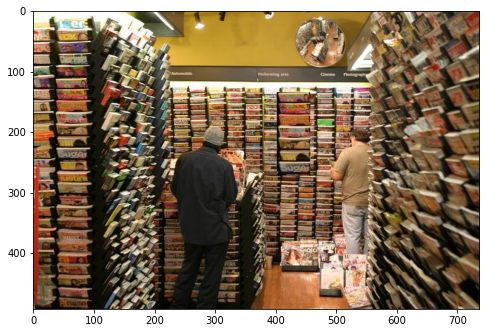

In [14]:
tampered1=cv2.imread(tampered_images[0])
plot_image(tampered1)

Getting the original image for the tampered image

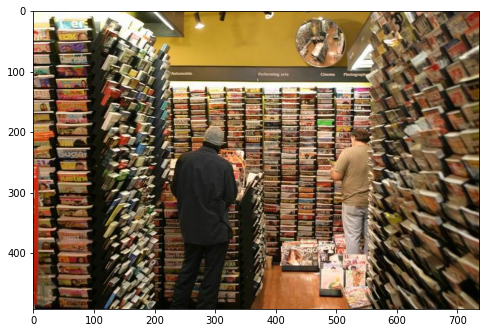

In [15]:
original1 , index=get_original(tampered_images[0])
if index!=-1:
    plot_image(original1)

## DBSCAN Clustering
It is a density-based clustering non-parametric algorithm: given a set of points in some space, it groups together points that are closely packed together (points with many nearby neighbors), marking as outliers points that lie alone in low-density regions (whose nearest neighbors are too far away).
The DBSCAN algorithm basically requires 2 parameters:
* **eps:** specifies how close points should be to each other to be considered a part of a cluster. It means that if the distance between two points is lower or equal to this value (eps), these points are considered neighbors.
* **minPoints:** the minimum number of points to form a dense region. For example, if we set the minPoints parameter as 5, then we need at least 5 points to form a dense region.

Now, two functions are defined for making clusters and detection of forgery using those clusters.
* make_clusters(de,eps,min_sample): This function will perform DBSCAN clustering and the role of parameters (eps,min_sample) is described above, it take another parameter which is de which is basically SIFT descriptor of the image.
* locate_forgery(img,clustering,kps): This function takes the image clusters made and the SIFT keypoints to mark the forgery on the image. It does so by drawing lines between points classified into the same clusters.


In [16]:
def make_clusters(de,eps=40,min_sample=2):
    clustering = DBSCAN(eps=eps, min_samples=min_sample).fit(de)
    return clustering

def locate_forgery(img,clustering,kps):
    forgery=img.copy()
    clusters = [[] for i in range(np.unique(clustering.labels_).shape[0]-1)]
    for idx in range(len(kps)):
        if clustering.labels_[idx]!=-1:
            clusters[clustering.labels_[idx]].append((int(kps[idx].pt[0]),int(kps[idx].pt[1])))
    for points in clusters:
        if len(points)>1:
            for idx1 in range(len(points)):
                for idx2 in range(idx1+1,len(points)):
                    cv2.line(forgery,points[idx2],points[idx1],(255,0,0),4)
    plot_image(forgery)

Let's check if we are able to detect forgery.

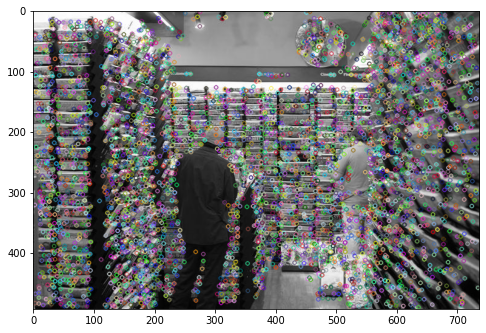

In [17]:
#let us extract SIFT features
key_points,descriptors=siftDetector(tampered1)
show_sift_features(tampered1,key_points)

Make cluster and locate forgery

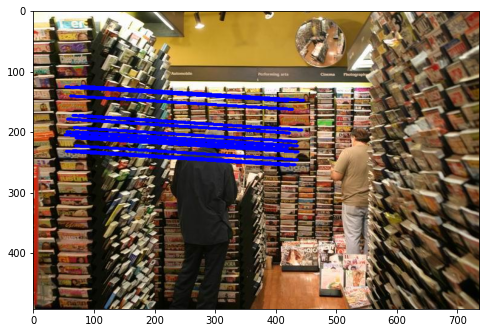

In [18]:
#Now Let's make clusters and locate forgery

clusters=make_clusters(descriptors)
locate_forgery(tampered1,clusters,key_points)

## Why this approach works?
This approach works well because of the scale invariance nature of SIFT and the clustering power of the DBSCAN algorithm.

Since the extracted features of the forged region should be similar to that of the original region so it is highly probable that they will be very close in the feature space and thus will be clustered together and this is the idea behind the above implementation.


### Example 2

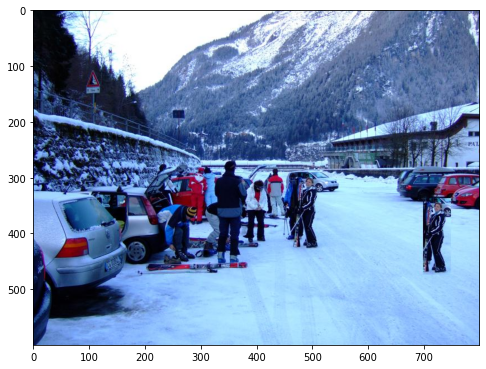

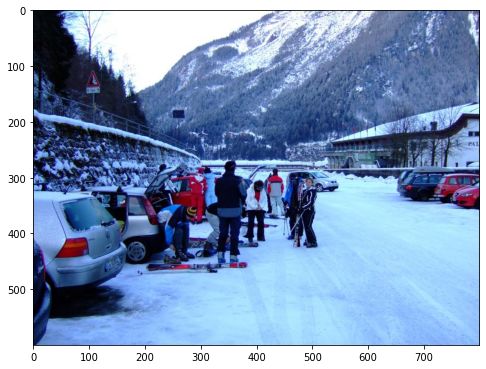

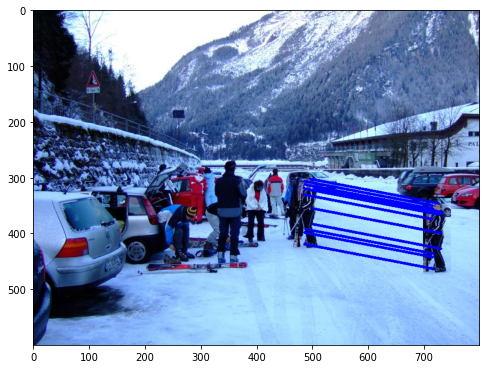

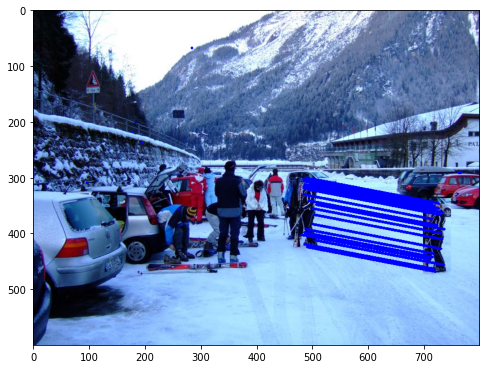

In [19]:
# Tampered image example2
tampered=cv2.imread(tampered_images[20])
plot_image(tampered)


# Original image for tampered image example2
original1 , index=get_original(tampered_images[20])
if index!=-1:
    plot_image(original1)


# Detecting key points, making clusters, and locating forgery
key_points,descriptors=siftDetector(tampered)
clusters=make_clusters(descriptors)
locate_forgery(tampered,clusters,key_points)


# Change Eps parameter to mark more/less features
clusters=make_clusters(descriptors,eps=80)
locate_forgery(tampered,clusters,key_points)

### Example 3



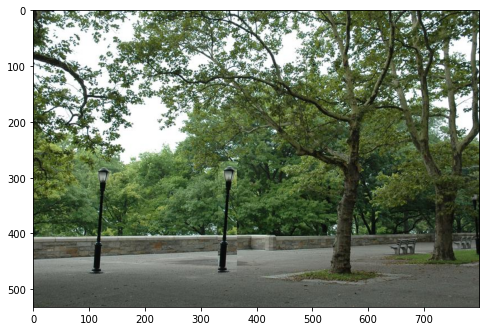

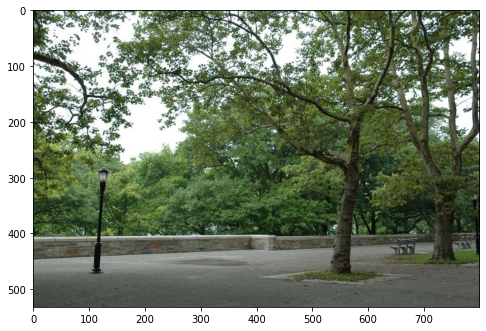

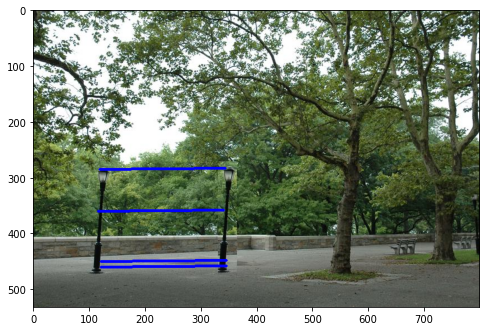

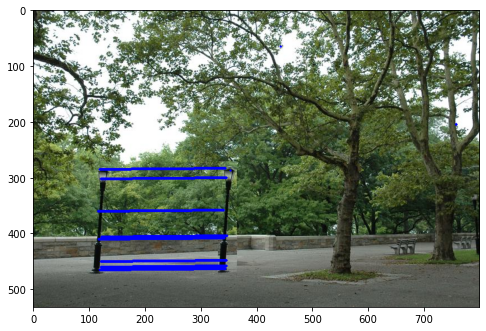

In [20]:
# Tampered image example3
tampered=cv2.imread(tampered_images[50])
plot_image(tampered)


# Original image for tampered image example2
original1 , index=get_original(tampered_images[50])
if index!=-1:
    plot_image(original1)


# Detecting key points, making clusters, and locating forgery
key_points,descriptors=siftDetector(tampered)
clusters=make_clusters(descriptors)
locate_forgery(tampered,clusters,key_points)


# Change Eps parameter to mark more/less features
clusters=make_clusters(descriptors,eps=80)
locate_forgery(tampered,clusters,key_points)

### Misc

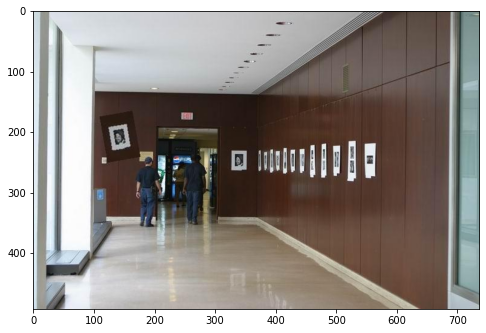

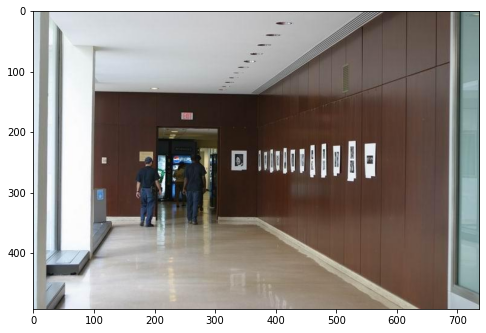

In [21]:
# Tampered image example2
tampered=cv2.imread(tampered_images[15])
plot_image(tampered)


# Original image for tampered image example2
original1 , index=get_original(tampered_images[15])
if index!=-1:
    plot_image(original1)

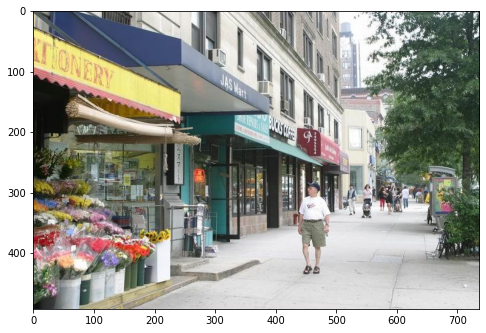

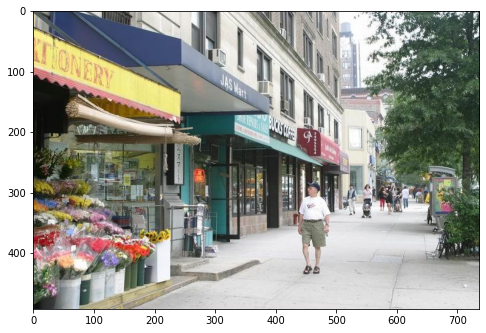

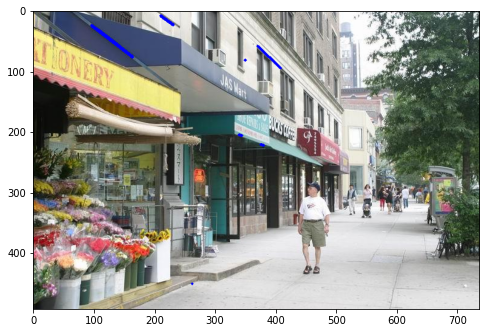

In [22]:
# Tampered image example2
tampered=cv2.imread(original_images[10])
plot_image(tampered)


# # Original image for tampered image example2
# original1 , index=get_original(original_images[10])
# if index!=-1:
#     plot_image(original1)

# Detecting key points, making clusters, and locating forgery
key_points,descriptors=siftDetector(tampered)
clusters=make_clusters(descriptors)
locate_forgery(tampered,clusters,key_points)


# Change Eps parameter to mark more/less features
clusters=make_clusters(descriptors,eps=80)
locate_forgery(tampered,clusters,key_points)